# Backgrounds:
This notebook gives some examples to illustrate how to use the `backgrounds` module of the `cascapy`package.

## Import the `Backgrounds` module

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cascapy.backgrounds import *
from cascapy.constants import eV

### Background photon density
Plot the photon density from different background (EBL, CMB, total) as a function of redshift

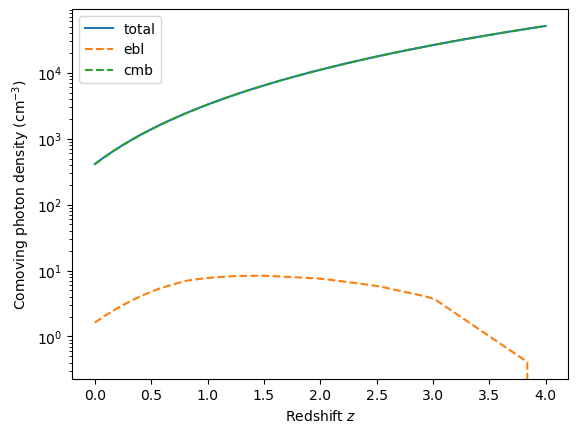

In [2]:
emin = 1.e-6 *eV
emax = 30*eV
e = np.logspace(np.log10(emin),np.log10(emax),500)
de = e[1:]-e[:-1]
e = np.sqrt(e[1:]*e[:-1])

z = np.linspace(0,4,50)
n = np.zeros_like(z)

# Total photon density
bb = BKG()
for i,zz in enumerate(z):
    n[i] = sum(bb.ne(e,zz) * de)
plt.plot(z,n,label='total')

# EBL photon density
ee = EBL()
for i,zz in enumerate(z):
    n[i] = sum(ee.ne(e,zz) * de)
plt.plot(z,n,'--',label='ebl')

# CMB photon density
cc = CMB()
for i,zz in enumerate(z):
    n[i] = sum(cc.ne(e,zz) * de)
plt.plot(z,n,'--',label='cmb')

plt.yscale('log')
plt.xlabel(r'Redshift $z$')
plt.ylabel(r'Comoving photon density (cm$^{-3}$)')
plt.legend()
plt.show()

### Background spectrum
Plot the CMB+EBL background as different redshifts

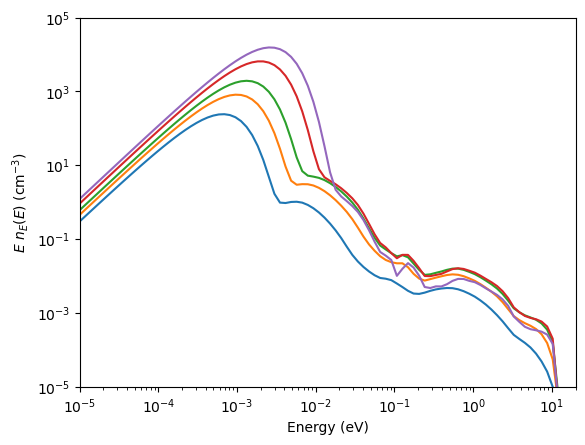

In [3]:
bb = BKG()

E = np.logspace(-5,2,100)*eV
for z in [0,0.5,1,2,3]:
    plt.loglog(E/eV,bb.ene(E,z),label=f"z = {z}")
plt.ylim(1.e-5,1.e5)
plt.xlim(1.e-5,20.)
plt.xlabel('Energy (eV)')
plt.ylabel(r"$E\ n_E(E)$ (cm$^{-3})$")
plt.show()


### EBL absorption coefficient
Plot the absorption coefficient as a function of observed energy, for different source redshifts.

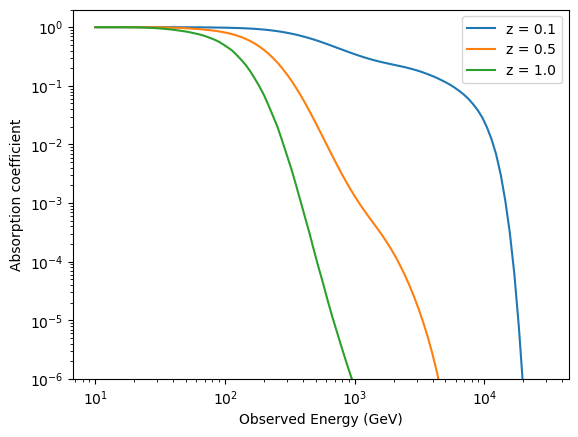

In [4]:
from cascapy.constants import GeV,TeV
import numpy as np
import matplotlib.pyplot as plt

E = np.logspace(np.log10(10*GeV),np.log10(30*TeV),100)

for z in [0.1,0.5,1.]:
    eabs = EBL(z=z).fabs
    plt.loglog(E/GeV,eabs(E),label=f'z = {z}')

plt.ylim(1.e-6,2)
plt.xlabel('Observed Energy (GeV)')
plt.ylabel('Absorption coefficient')
plt.legend()
plt.show()